In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [18]:
df=pd.read_csv(r'D:\Seme\Year_4_Semester_1\DeepLearning\TH\week1\seeds_dataset.txt', sep="\t+", header=None)

In [19]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


# 1.  Sử dụng thống kê mô tả, mô tả về bộ dữ liệu trên

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [21]:
df.describe()

,0,1,2,3,4,5,6,7
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# 2.  Trực quan hóa dữ liệu với các biểu đồ box, histogram, scatter matrix, grid line

<Axes: >

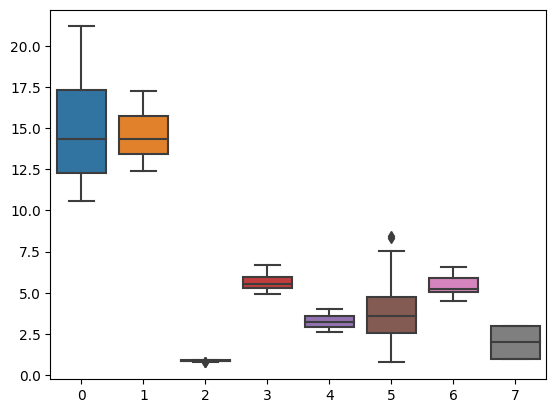

In [22]:
# vẽ biểu đồ boxplot của lable
# sns.boxplot(data=df[[7]])
sns.boxplot(data=df[[0,1,2,3,4,5,6,7]])

<Axes: ylabel='Count'>

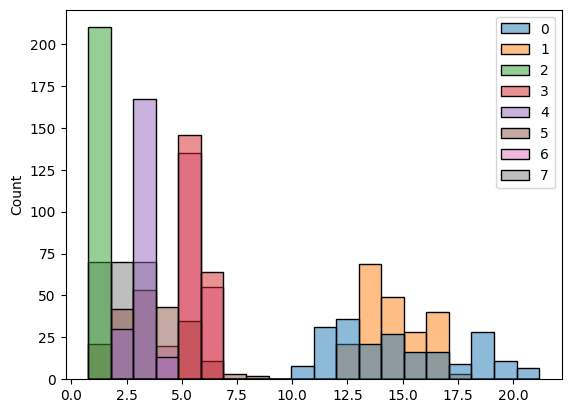

In [23]:
# histogram của label
sns.histplot(data=df)

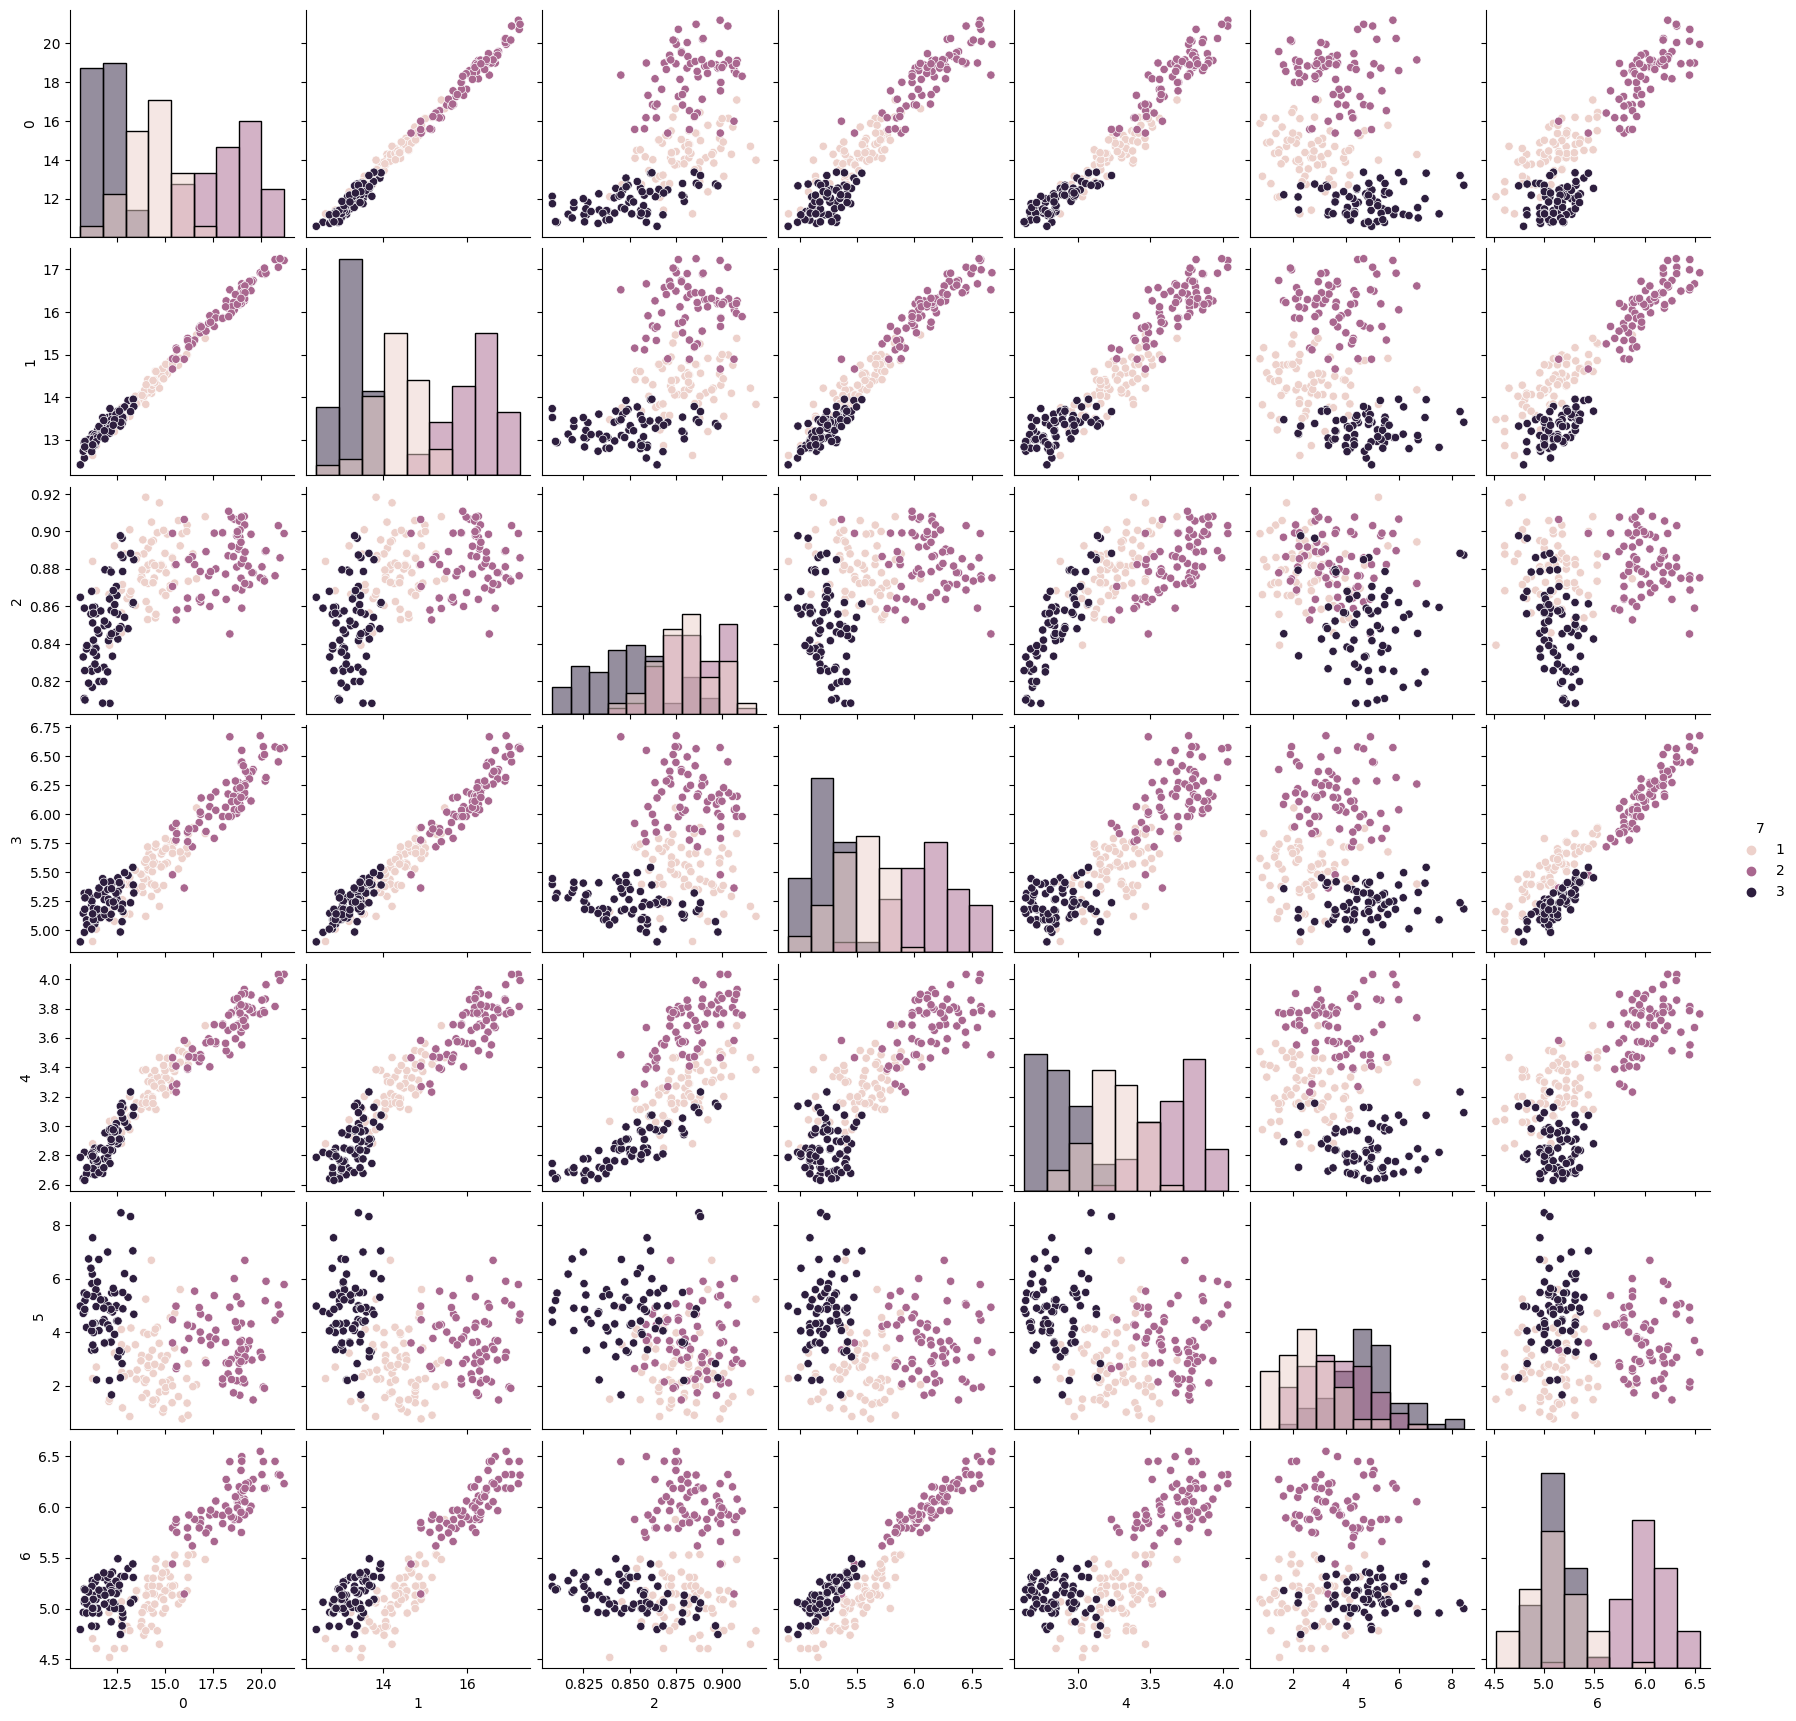

In [24]:
sns.pairplot(df,hue=7, diag_kind="hist")

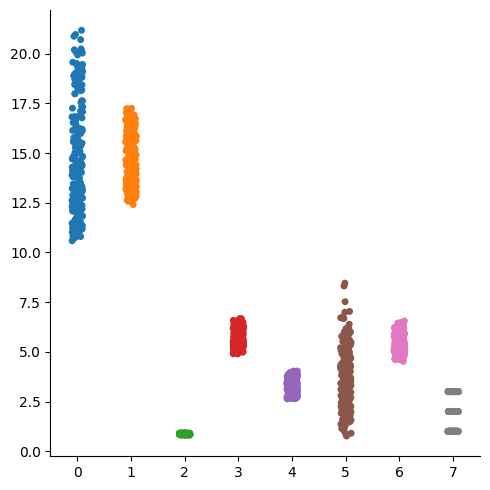

In [25]:
sns.catplot(data=df)

# 3.  Cho biết những dữ liệu còn thiếu và đề xuất cách xử lý dữ liệu thiếu đó 

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       210 non-null    float64
 1   1       210 non-null    float64
 2   2       210 non-null    float64
 3   3       210 non-null    float64
 4   4       210 non-null    float64
 5   5       210 non-null    float64
 6   6       210 non-null    float64
 7   7       210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


- Không có dữ liệu bị thiếu
- Nếu dự liệu bị thiếu ta có thể dùng các giá trị mean, median, kmean để xác định các giá trị bị thiếu đó hoặc ta có thể bỏ dòng dữ liệu đó nếu dữ liệu bị thiếu quá nhiều hoặc không quang trọng trong bộ dữ liệu

# 4.  Chia bộ dữ liệu thành 2 phần Train/Test với các tỉ lệ nhất định 

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
la=LabelEncoder()
y=la.fit_transform(df[7])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5.  Đánh giá bộ dữ liệu với giải thuật KNN bằng phương pháp 10-Fold (k-fold)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [30]:
knn=KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

In [31]:
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Standard Deviation: ", scores.std())

Scores:  [0.82352941 0.94117647 0.82352941 0.88235294 0.82352941 0.82352941
 0.94117647 0.94117647 1.         0.875     ]
Mean:  0.8875
Standard Deviation:  0.06152351366399692


# 6.  Huấn luyện dữ liệu cho bài toán phân lớp sử dụng với các giải thuật Decision Tree,  Bayes, SVM và XGBoot.

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from xgboost import XGBClassifier

def train_and_evaluation(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    cm= confusion_matrix(y_test, y_pred)
    return acc, f1, cm

In [33]:
decition_tree = DecisionTreeClassifier()
naive_bayes = GaussianNB()
svm = SVC()
xgboost = XGBClassifier(tree_method='gpu_hist', gpu_id=0)

# 7,8,9. Tính độ đo F1 score, Tính độ đo Accuracy, Tính độ đo Confusion Matrix

In [34]:
acc_dt, f1_dt, cm_dt = train_and_evaluation(decition_tree, X_train, y_train, X_test, y_test)
acc_nb, f1_nb, cm_nb = train_and_evaluation(naive_bayes, X_train, y_train, X_test, y_test)
acc_svm, f1_svm, cm_svm = train_and_evaluation(svm, X_train, y_train, X_test, y_test)
acc_xgb, f1_xgb, cm_xgb = train_and_evaluation(xgboost, X_train, y_train, X_test, y_test)

# 10. So sánh kết quả các độ đo 6,7,8 với các giải thuật học máy ở trên

In [38]:
compare=pd.DataFrame(data=[["Decision Tree", acc_dt, f1_dt], ["Naive Bayes", acc_nb, f1_nb], ["SVM", acc_svm, f1_svm], ["XGBoost", acc_xgb, f1_xgb]], columns=['Model', 'Accuracy', 'F1 Score'])
compare

,Model,Accuracy,F1 Score
0,Decision Tree,0.833333,0.824236
1,Naive Bayes,0.857143,0.846066
2,SVM,0.904762,0.898477
3,XGBoost,0.904762,0.902778


<Axes: xlabel='Model', ylabel='Accuracy'>

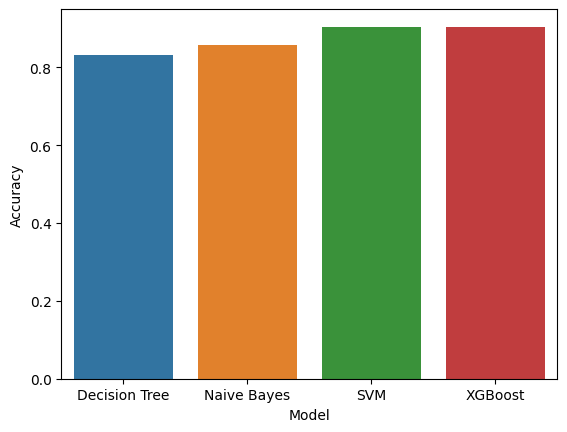

In [44]:
sns.barplot(x='Model', y='Accuracy', data=compare)

<Axes: xlabel='Model', ylabel='F1 Score'>

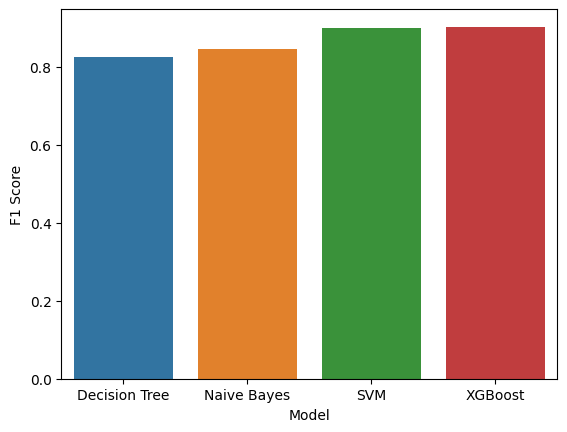

In [45]:
sns.barplot(x='Model', y='F1 Score', data=compare)

Text(0.5, 1.0, 'XGBoost')

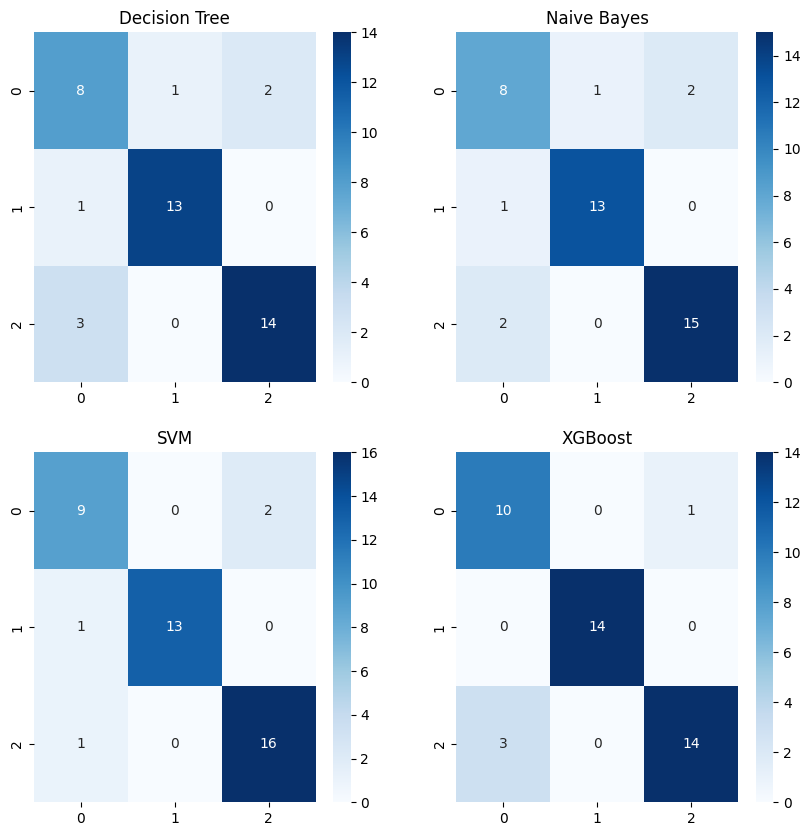

In [46]:
# plot confusion matrix
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
sns.heatmap(cm_dt, annot=True, ax=ax[0][0], fmt='g', cmap='Blues')
ax[0][0].set_title('Decision Tree')
sns.heatmap(cm_nb, annot=True, ax=ax[0][1], fmt='g', cmap='Blues')
ax[0][1].set_title('Naive Bayes')
sns.heatmap(cm_svm, annot=True, ax=ax[1][0], fmt='g', cmap='Blues')
ax[1][0].set_title('SVM')
sns.heatmap(cm_xgb, annot=True, ax=ax[1][1], fmt='g', cmap='Blues')
ax[1][1].set_title('XGBoost')

# 11. Lưu model với giải thuật đạt kết quả tốt nhất

- Model có kết quả tốt nhất là Xgboost

In [47]:
import joblib
joblib.dump(xgboost, 'xgboost.pkl')

['xgboost.pkl']